In [1]:
from tqdm.notebook import tqdm, trange
import pandas as pd
import numpy as np
import torch as pt
import matplotlib.pyplot as plt
import seaborn as sns
import pyqtgraph as pg
import pyqtgraph.opengl as gl

from calibrators import Calibrator
from calibrators.models import Complex

In [2]:
data = {
    'good': pd.read_csv('./data_archive/good_readings.csv'),
    'okay': pd.read_csv('./data_archive/okay_readings.csv'),
    'bad': pd.read_csv('./data_archive/bad_readings.csv'),
    'ref': pd.Series([17.8480, 4.5939, 50.8366], index=['mag_x','mag_y','mag_z'])
}

In [3]:
data_adj = {}
coefs = {}
calibs = {}
for key, val in data.items():
    if key == 'ref': continue
    calibs[key] = Calibrator(val.values, data['ref'], Model=Complex, verbose=True)
    data_adj[key] = calibs[key].calibrate(10000, 5e-2)
    coefs[key] = calibs[key].coefs

In [16]:
for key, val in calibs.items():
    data_adj[key] = val.calibrate(10000, 1e-3)
    coefs[key] = val.coefs

In [87]:
data_adj['bad'] = calibs['bad'].calibrate(10000, 1e-3)
coefs['bad'] = val.coefs

In [88]:
coefs['good']

,bias,skew_x,skew_y,skew_z
x,24.305285,1.185224,0.279739,-0.264001
y,7.320815,-0.156722,0.959104,0.585708
z,18.775627,0.341584,-0.449187,1.141401


In [89]:
coefs['okay']

,bias,skew_x,skew_y,skew_z
x,26.484926,1.167741,0.277842,0.186012
y,6.165132,-0.263411,1.119956,-0.149554
z,19.960161,-0.283643,0.253745,1.239821


In [90]:
coefs['bad']

,bias,skew_x,skew_y,skew_z
x,30.102615,0.965088,0.140563,0.099307
y,36.936974,-0.149080,0.504672,-0.569905
z,45.336151,-0.144856,0.390837,0.738757


In [91]:
print('good:', np.sqrt((data_adj['good']**2).sum(axis=1)).mean())
print('okay:', np.sqrt((data_adj['okay']**2).sum(axis=1)).mean())
print('bad:', np.sqrt((data_adj['bad']**2).sum(axis=1)).mean())
print('ref:', np.sqrt((data['ref']**2).sum()))

good: 54.00223
okay: 54.01182
bad: 54.025574
ref: 54.07416130436051


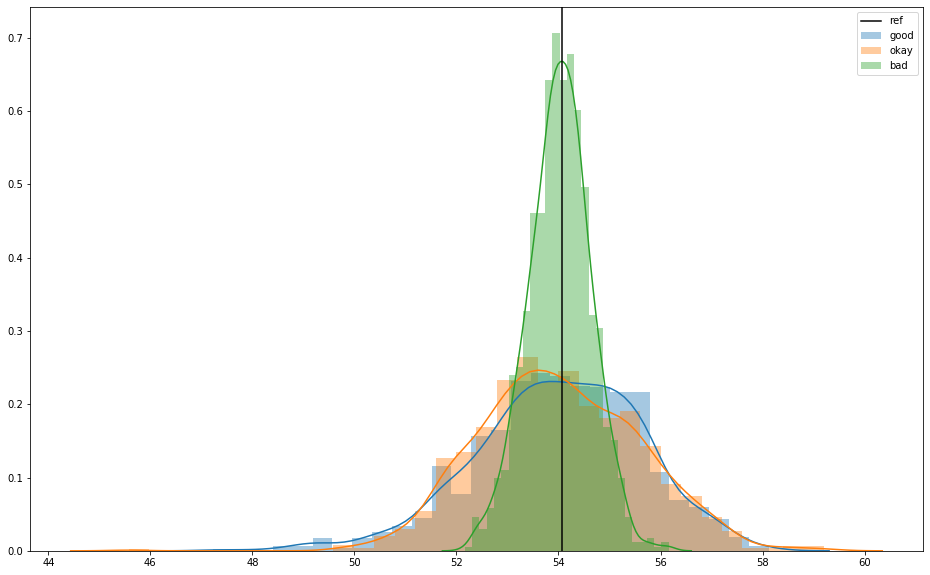

In [92]:
plt.figure(figsize=(16,10))
sns.distplot(np.sqrt((data_adj['good']**2).sum(axis=1)), label='good')
sns.distplot(np.sqrt((data_adj['okay']**2).sum(axis=1)), label='okay')
sns.distplot(np.sqrt((data_adj['bad']**2).sum(axis=1)), label='bad')
plt.axvline(np.sqrt((data['ref']**2).sum()), color='#000000', label='ref')
plt.legend()